In [122]:
# Imporing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import os
os.chdir("C:\\Users\\chint\\Downloads\\mulispectral image")

In [123]:
# Reading CSV File
dataset= pd.read_csv('bank-marketing.csv')
dataset.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [124]:
# Shape of the Data
dataset.shape

(45211, 19)

In [125]:
dataset.info()
# After checking, there is no missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [126]:
#Univariate analysis
dataset.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [127]:
dataset['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [128]:
dataset['pdays'].describe()

# Here we can see lot of values are -1. Around 75 percent of the values are -1. -1 means that previously they were contacted or not. So we remove the values associated with -1

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [129]:
#Removing -1 from pdays, as they serve no purpose and ignore these values.

dataset1=dataset.copy()
dataset1.drop(dataset1[dataset1['pdays']<0].index, inplace=True)
dataset1['pdays'].describe()
# we can see changes in the mean and median values after removing -1.

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [130]:
dataset['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

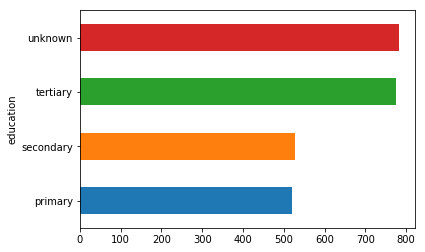

In [131]:
dataset1.groupby(['education'])['balance'].median().plot.barh()

# persons having tertiary education level have highest median value

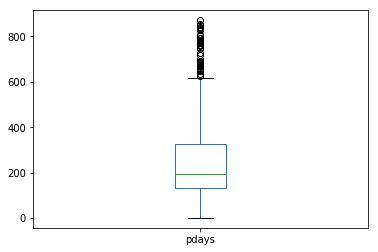

In [132]:
#- Make a box plot for pdays. Do you see any outliers?
dataset1['pdays'].plot.box()
plt.show()

# We can see there are outliers in pdays with the box plot

In [133]:
#- Convert the response variable to a convenient form
dataset1['response'].value_counts(normalize =True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [134]:
dataset1.replace({'response': {"yes": 1,'no':0}},inplace=True)


In [136]:
#- Make suitable plots for associations with numerical features and categorical features’
#seperating object and numerical data types 
obj_col = []
num_col = []
for col in dataset.columns:
    if dataset1[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)
        
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)        

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


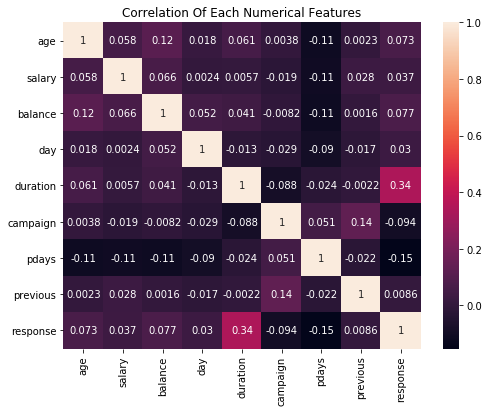

In [137]:
# Correlation plot for associations with numerical features

plt.figure(figsize=(8,6))
sns.heatmap(dataset1.corr(),annot=True)
plt.title("Correlation Of Each Numerical Features")
plt.show()

# Duration is highly co-related with response while pdays is not highly correlated with response

In [138]:
# Label encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
dataset2 = dataset1[obj_col].apply(LabelEncoder().fit_transform)
dataset2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [139]:
dataset3 = dataset2.join(dataset1[num_col])
dataset3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [140]:
dataset3.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


In [141]:
#Predictive model 1: Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")



In [142]:
X = dataset3.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [143]:
y= dataset3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [145]:
lr = LogisticRegression()

In [146]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
#- Estimate the model performance using k fold cross validation
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
d= np.mean(cv_score)
print("accuracy:" + str(d))

accuracy:0.7797123524981266


In [148]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

[0 0 0 ... 0 0 0]
             precision    recall  f1-score   support

          0       0.80      0.96      0.88      1279
          1       0.59      0.19      0.29       373

avg / total       0.76      0.79      0.74      1652



In [82]:
#Confusion Matrix
confusion_matrix(y_pred,y_test)

array([[1230,  302],
       [  49,   71]], dtype=int64)

In [102]:
# Accuracy
from sklearn.metrics import accuracy_score
z=accuracy_score(y_pred,y_test)
print(" Accuracy is " + str(z))

 Accuracy is 0.7875302663438256


In [97]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_pred,y_test, average=None)


array([0.80287206, 0.59166667])

In [99]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_pred,y_test, average=None)

array([0.96168882, 0.19034853])

In [83]:
# F1 score
f1_score(y_pred,y_test)

0.28803245436105473

In [84]:
#Use RFE to select top n features in an automated fashion 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [85]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [86]:
X_train.columns[rfe.support_]


Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [87]:
cols = X_train.columns[rfe.support_]

In [88]:
lr.fit(X_train[cols],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
y_pred2 = lr.predict(X_test[cols])

In [90]:
f1_score(y_pred2,y_test)

0.5043478260869565

In [91]:
confusion_matrix(y_pred2,y_test)

array([[1222,  228],
       [  57,  145]], dtype=int64)

In [93]:
# - Using p values and VIF, getting rid of the redundant features
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Based upon VIF Age, education, salary, targeted  are redundant feature from logistic regression model perspective


,Features,VIF
10,age,11.79
2,education,6.43
3,targeted,6.43
11,salary,5.38
16,pdays,5.21
1,marital,4.35
13,day,4.10
8,month,3.60
5,housing,3.14
15,campaign,2.87


In [ ]:
# Based upon VIF, Housing, loan,duration, default, poutcome are imp feature from logistic regression model 

In [113]:
# Model 2 Random Forest
# Using the feature importance values from the Random Forest module, identify the most important features for the model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)
rfc.fit(X_train,y_train)



In [106]:
#K- fold cross validation
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
i= np.mean(cv1_score)
print("Accuracy:" + str(i))

Accuracy:0.8410263549440078


In [107]:
y_pred1 = rfc.predict(X_test)

In [108]:
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.86      0.95      0.90      1279
          1       0.74      0.45      0.56       373

avg / total       0.83      0.84      0.83      1652



In [109]:
#Confusion Matrix
confusion_matrix(y_pred1,y_test)

array([[1221,  205],
       [  58,  168]], dtype=int64)

In [110]:
# Accuracy
from sklearn.metrics import accuracy_score
z=accuracy_score(y_pred,y_test)
print(" Accuracy is " + str(z))

 Accuracy is 0.7875302663438256


In [111]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_pred,y_test, average=None)

array([0.80287206, 0.59166667])

In [112]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_pred,y_test, average=None)

array([0.96168882, 0.19034853])

Feature: 0, Score: 0.02164
Feature: 1, Score: 0.00162
Feature: 2, Score: 0.00952
Feature: 3, Score: 0.00163
Feature: 4, Score: 0.00022
Feature: 5, Score: 0.10913
Feature: 6, Score: 0.01226
Feature: 7, Score: 0.00153
Feature: 8, Score: 0.04085
Feature: 9, Score: 0.23330
Feature: 10, Score: 0.03261
Feature: 11, Score: 0.01084
Feature: 12, Score: 0.02300
Feature: 13, Score: 0.01179
Feature: 14, Score: 0.31644
Feature: 15, Score: 0.00812
Feature: 16, Score: 0.15642
Feature: 17, Score: 0.00908


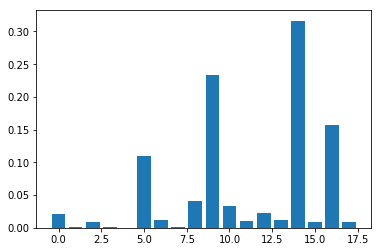

In [116]:
# random forest for feature importance on a classification problem
from matplotlib import pyplot
# get importance
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [117]:
#Random forest feature importance
# Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST perspective.
importances = rfc.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

sorted_indices

array([14,  9, 16,  5,  8, 10, 12,  0,  6, 13, 11,  2, 17, 15,  3,  1,  7,
        4], dtype=int64)

In [ ]:
# Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST perspective.

In [154]:
#Compare the performance of the Random Forest and the logistic model –

#For Logistic Regression
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


# For Random Forest
y_pred1 = rfc.predict(X_test)
print(classification_report(y_test, y_pred1))


#Random Forest performs better on the test set

             precision    recall  f1-score   support

          0       0.80      0.96      0.88      1279
          1       0.59      0.19      0.29       373

avg / total       0.76      0.79      0.74      1652

             precision    recall  f1-score   support

          0       0.86      0.95      0.90      1279
          1       0.74      0.45      0.56       373

avg / total       0.83      0.84      0.83      1652



In [ ]:
#Compare the feature importance from the different models – do they agree? Are the topfeatures similar in both model

#By comparing feature importances from both models, Housing, poutcome,duration, duration are important features in both model